<a href="https://colab.research.google.com/github/jhordi19/Ciencia_de_datos/blob/Taller_2025/Taller_Sem06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Preprocesamiento de datos**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

df = pd.read_csv("hypertension_dataset.csv")

In [ ]:
df.head(10)

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High
5,UK,44,31.5,293,158,118,Former,20.3,Moderate,No,...,8.1,98,81,69,181,85,Male,Tertiary,Employed,High
6,South Korea,88,30.9,263,118,62,Current,8.6,Low,Yes,...,4.0,88,114,52,139,194,Male,Secondary,Employed,Low
7,Canada,25,18.1,151,175,101,Never,16.6,Low,Yes,...,5.8,99,154,34,132,193,Female,Secondary,Employed,High
8,Canada,89,19.0,198,102,104,Former,10.5,Low,Yes,...,6.6,56,157,81,145,161,Female,Primary,Retired,Low
9,Brazil,33,39.1,268,168,98,Current,20.7,Moderate,No,...,8.0,76,89,37,223,164,Male,Primary,Retired,High


In [ ]:
df.isnull().sum()

,0
Country,0
Age,0
BMI,0
Cholesterol,0
Systolic_BP,0
Diastolic_BP,0
Smoking_Status,0
Alcohol_Intake,0
Physical_Activity_Level,0
Family_History,0


In [ ]:
cols = [
    'Gender', 'Age', 'BMI', 'Physical_Activity_Level', 'Sleep_Duration',
    'Smoking_Status', 'Family_History', 'Stress_Level', 'Hypertension'
]
df = df[cols].copy()

mappings = {
    'Gender': {'Female': 0, 'Male': 1},
    'Physical_Activity_Level': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Smoking_Status': {'Never': 0, 'Former': 1, 'Current': 2},
    'Family_History': {'No': 0, 'Yes': 1},
    'Hypertension': {'Low': 0, 'High': 1}
}
for col, mapping in mappings.items():
    df[col] = df[col].map(mapping)

df['Sleep_Duration'] = df['Sleep_Duration'].round()
df = df.dropna()

X = df.drop('Hypertension', axis=1)
y = df['Hypertension']


### **RANDOM FOREST**

In [ ]:
# 2. Aplicar SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 3. Entrenamiento con mejores hiperparámetros encontrados
best_params_model = RandomForestClassifier(
    n_estimators=121,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=False,
    class_weight='balanced',
    random_state=42
)

best_params_model.fit(X_train, y_train)

# 4. Resultados
y_pred = best_params_model.predict(X_test)

print("\nEvaluación del modelo Random Forest (con SMOTE y mejores parámetros):")
print(classification_report(y_test, y_pred))
print(f"Accuracy Test: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score Test: {f1_score(y_test, y_pred):.4f}")


Evaluación del modelo Random Forest (con SMOTE y mejores parámetros):
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     25157
           1       0.72      0.74      0.73     25156

    accuracy                           0.73     50313
   macro avg       0.73      0.73      0.72     50313
weighted avg       0.73      0.73      0.72     50313

Accuracy Test: 0.7250
F1 Score Test: 0.7299


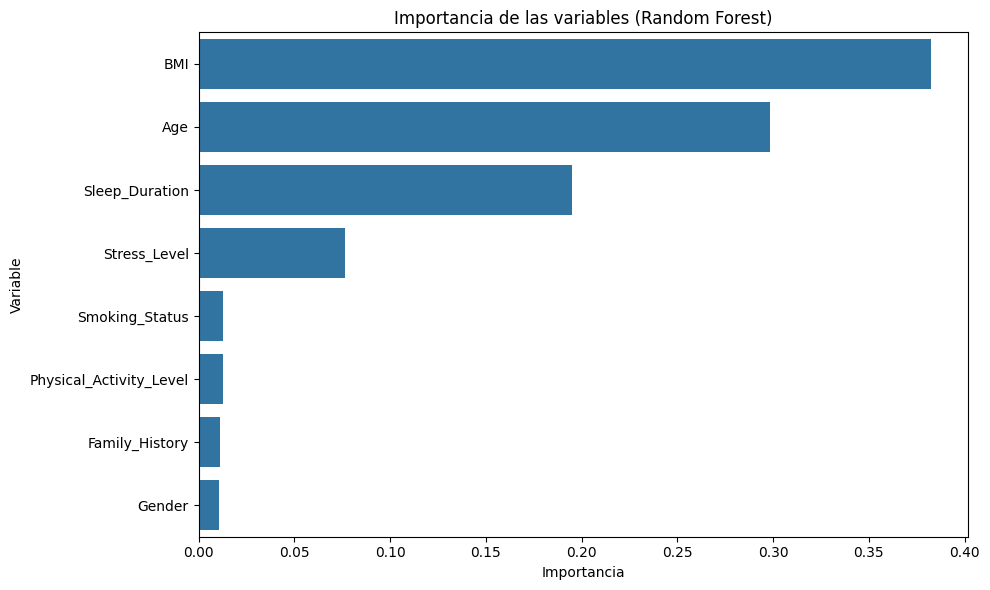

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de usar el modelo y las columnas correctas
importancias = best_params_model.feature_importances_
columnas = X_train.columns

# Crear DataFrame ordenado
importancia_df = pd.DataFrame({
    'Variable': columnas,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df, x='Importancia', y='Variable')
plt.title('Importancia de las variables (Random Forest)')
plt.tight_layout()
plt.show()

###**REGRESION LOGISTICA**

In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# 1. Preprocesamiento y SMOTE ya aplicados
# X, y ya preparados con mappings y columnas correctas

X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.1, stratify=y_res, random_state=42)

# 2. Entrenamiento
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train, y_train)

# 3. Evaluación
y_pred_lr = lr_model.predict(X_test)

print("\nEvaluación del modelo Logistic Regression (con SMOTE):")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score Test: {f1_score(y_test, y_pred_lr):.4f}")


Evaluación del modelo Logistic Regression (con SMOTE):
              precision    recall  f1-score   support

           0       0.56      0.57      0.57     12579
           1       0.56      0.55      0.56     12578

    accuracy                           0.56     25157
   macro avg       0.56      0.56      0.56     25157
weighted avg       0.56      0.56      0.56     25157

Accuracy Test: 0.5606
F1 Score Test: 0.5556


###**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("\nEvaluación del modelo Decision Tree (con SMOTE):")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"F1 Score Test: {f1_score(y_test, y_pred_dt):.4f}")


Evaluación del modelo Decision Tree (con SMOTE):
              precision    recall  f1-score   support

           0       0.67      0.71      0.69     25157
           1       0.69      0.65      0.67     25156

    accuracy                           0.68     50313
   macro avg       0.68      0.68      0.68     50313
weighted avg       0.68      0.68      0.68     50313

Accuracy Test: 0.6818
F1 Score Test: 0.6714


###**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.1, stratify=y_res, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("\nEvaluación del modelo Naive Bayes (con SMOTE):")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"F1 Score Test: {f1_score(y_test, y_pred_nb):.4f}")


Evaluación del modelo Naive Bayes (con SMOTE):
              precision    recall  f1-score   support

           0       0.56      0.57      0.56     12579
           1       0.56      0.56      0.56     12578

    accuracy                           0.56     25157
   macro avg       0.56      0.56      0.56     25157
weighted avg       0.56      0.56      0.56     25157

Accuracy Test: 0.5618
F1 Score Test: 0.5600


###**XGBoost**

In [ ]:
!pip install xgboost # Install the xgboost package
from xgboost import XGBClassifier

X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("\nEvaluación del modelo XGBoost (con SMOTE):")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score Test: {f1_score(y_test, y_pred_xgb):.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:19:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Evaluación del modelo XGBoost (con SMOTE):
              precision    recall  f1-score   support

           0       0.75      0.44      0.55     25157
           1       0.60      0.86      0.71     25156

    accuracy                           0.65     50313
   macro avg       0.68      0.65      0.63     50313
weighted avg       0.68      0.65      0.63     50313

Accuracy Test: 0.6452
F1 Score Test: 0.7068


In [ ]:
y_pred_lr = lr_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)


In [ ]:
print("y_test:", len(y_test))
print("y_pred (Random Forest):", len(y_pred))
print("y_pred_lr (Logistic Regression):", len(y_pred_lr))
print("y_pred_dt (Decision Tree):", len(y_pred_dt))
print("y_pred_nb (Naive Bayes):", len(y_pred_nb))
print("y_pred_xgb (XGBoost):", len(y_pred_xgb))


y_test: 50313
y_pred (Random Forest): 50313
y_pred_lr (Logistic Regression): 50313
y_pred_dt (Decision Tree): 50313
y_pred_nb (Naive Bayes): 50313
y_pred_xgb (XGBoost): 50313


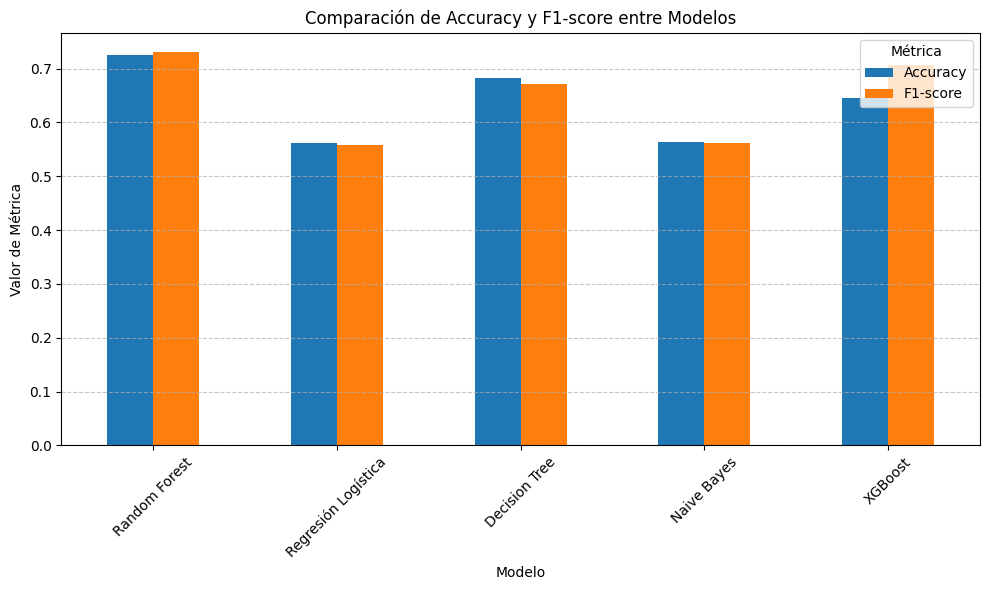

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Diccionario de métricas actualizadas
resultados = {
    'Random Forest':        {'Accuracy': accuracy_score(y_test, y_pred),        'F1-score': f1_score(y_test, y_pred)},
    'Regresión Logística':  {'Accuracy': accuracy_score(y_test, y_pred_lr),     'F1-score': f1_score(y_test, y_pred_lr)},
    'Decision Tree':        {'Accuracy': accuracy_score(y_test, y_pred_dt),     'F1-score': f1_score(y_test, y_pred_dt)},
    'Naive Bayes':          {'Accuracy': accuracy_score(y_test, y_pred_nb),     'F1-score': f1_score(y_test, y_pred_nb)},
    'XGBoost':              {'Accuracy': accuracy_score(y_test, y_pred_xgb),    'F1-score': f1_score(y_test, y_pred_xgb)},
}

# Crear DataFrame y gráfico
df_resultados = pd.DataFrame(resultados).T
df_resultados.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Accuracy y F1-score entre Modelos')
plt.ylabel('Valor de Métrica')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.legend(title='Métrica')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
